In [12]:
# Tomato Leaf Disease Detection

# In this program I will build 3 differnt CNN models to find maximum accuracy

# and then will do the testing with the model from which we obtain highest accuracy.

# Code I: I have used one FC layer with batch size = default
# CodeII: I have used two FC layer with batch size = default
# Code III: I have used one FC layer with batch size = 64

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import cv2 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report,confusion_matrix
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# Importing the images 
for dirname, _, filenames in os.walk('/content/drive/MyDrive/machine learning projects/training set/Tomato leaf disease detection/tomato'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [15]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/machine learning projects/training set/Tomato leaf disease detection/tomato/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/machine learning projects/training set/Tomato leaf disease detection/tomato/val',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

Found 10000 images belonging to 10 classes.
Found 984 images belonging to 10 classes.


In [16]:
# First model

model = Sequential()

#Convolution layer 1
model.add(Conv2D(16,(2,2), activation='relu',input_shape=[150, 150,3]))

# Pooling 1
model.add(MaxPooling2D(2,2))

#Convolution layer 2
model.add(Conv2D(32,(3,3), activation='relu'))

# Pooling 2
model.add(MaxPooling2D(2,2))

# Flattening
model.add(Flatten())
model.add(Dropout(0.3))
#Full Conncetion
model.add(Dense(128,activation='relu'))

#Output Layer
model.add(Dense(10,activation='sigmoid'))

#Compiling
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 149, 149, 16)      208       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 41472)             0         
                                                                 
 dropout_2 (Dropout)         (None, 41472)            

In [17]:
# Fit
temp = model.fit(x = train_generator, validation_data=test_generator,epochs=25)

Epoch 1/25
313/313 [==============================] - 2245s 7s/step - loss: 0.2010 - accuracy: 0.5769 - val_loss: 0.1744 - val_accuracy: 0.6220
Epoch 2/25
313/313 [==============================] - 214s 682ms/step - loss: 0.1127 - accuracy: 0.7978 - val_loss: 0.1837 - val_accuracy: 0.6209
Epoch 3/25
313/313 [==============================] - 213s 681ms/step - loss: 0.0895 - accuracy: 0.8439 - val_loss: 0.1459 - val_accuracy: 0.7205
Epoch 4/25
313/313 [==============================] - 212s 678ms/step - loss: 0.0754 - accuracy: 0.8691 - val_loss: 0.1431 - val_accuracy: 0.7337
Epoch 5/25
313/313 [==============================] - 212s 675ms/step - loss: 0.0665 - accuracy: 0.8839 - val_loss: 0.1088 - val_accuracy: 0.8059
Epoch 6/25
313/313 [==============================] - 212s 677ms/step - loss: 0.0551 - accuracy: 0.9102 - val_loss: 0.1438 - val_accuracy: 0.7703
Epoch 7/25
313/313 [==============================] - 212s 677ms/step - loss: 0.0539 - accuracy: 0.9096 - val_loss: 0.1291 - v

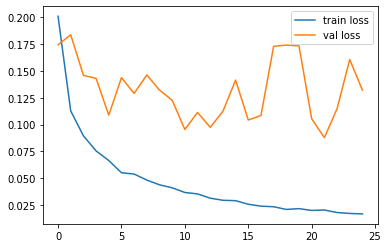

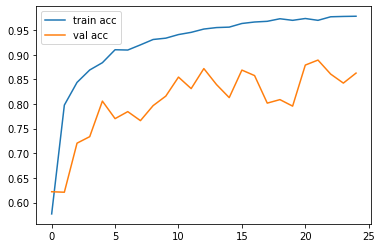

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(temp.history['loss'], label='train loss')
plt.plot(temp.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(temp.history['accuracy'], label='train acc')
plt.plot(temp.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# Testing the model
from keras.preprocessing import image
test = image.load_img("/content/drive/MyDrive/machine learning projects/training set/Tomato leaf disease detection/tomato/val/Tomato___Spider_mites Two-spotted_spider_mite/00fa99e8-2605-4d72-be69-98277587d84b___Com.G_SpM_FL 1453.JPG",target_size = (150, 150))
test=image.img_to_array(test)
test=np.expand_dims(test,axis=0)
result=cnn.predict(test)

NameError: ignored

In [ ]:
result